# DATA CLEANING AND EXPLORATORY DATA ANALYSIS - US STARTUPS 

### Context
The dataset contains information on startup companies in the US from 2006-2022. Includes company name, location, team size, number of founders, social media and other relevant information. This data can be used to empower the next wave of entrepreneurs by providing insights on what types of startups are being founded, where they are located in US, what team size are preferred by most startups, which is the biggest startup company and social media tagged by startups. Additionally, this dataset can be used to understand trends in the startup industry over time. 

#### The following steps are involved in this project:

* Selecting and downloading a dataset (Sourse: Kaggle Datasets)
* Data preparation and cleaning
* Exploratory analysis and visualization
* Asking and answering interesting questions

### DATA PREPARATION AND CLEANING

In [1]:
#importing modules for data preparation and cleaning
import numpy as np
import pandas as pd

import chardet
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

np.random.seed(0)

In [2]:
#Let's load the CSV file using the Pandas library
us_startups_raw_df = pd.read_csv(r'C:\Users\dimpl\Downloads\company.csv',encoding="utf-8")

In [3]:
us_startups_raw_df.head(5)

,id,company_name,link,short_description,founded,team_size,location,country,no_founders,no_company_socials,no_tags,description
0,1,Airbnb,http://airbnb.com,Book accommodations around the world.,2008,5000,San Francisco,USA,3,4,4,Founded in August of 2008 and based in San Fra...
1,2,Amplitude,https://amplitude.com,Pioneering Digital Optimization,2012,500,San Francisco,USA,2,1,3,Amplitude is the global leader in Digital Opti...
2,3,DoorDash,http://doordash.com,Restaurant delivery.,-1,1600,San Francisco,USA,3,4,2,"Founded in 2013, DoorDash is a San Francisco-b..."
3,4,Coinbase,https://www.coinbase.com,"Buy, sell, and manage cryptocurrencies.",2012,500,San Francisco,USA,1,3,2,"Founded in June of 2012, Coinbase is a digital..."
4,5,Dropbox,http://dropbox.com,Backup and share files in the cloud.,2008,4000,San Francisco,USA,2,4,2,Dropbox is building the world’s first smart wo...


In [4]:
us_startups_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  1000 non-null   int64 
 1   company_name        1000 non-null   object
 2   link                999 non-null    object
 3   short_description   993 non-null    object
 4   founded             1000 non-null   int64 
 5   team_size           1000 non-null   int64 
 6   location            985 non-null    object
 7   country             1000 non-null   object
 8   no_founders         1000 non-null   int64 
 9   no_company_socials  1000 non-null   int64 
 10  no_tags             1000 non-null   int64 
 11  description         969 non-null    object
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [5]:
us_startups_df=us_startups_raw_df.copy()

In [6]:
us_startups_df.drop_duplicates()

,id,company_name,link,short_description,founded,team_size,location,country,no_founders,no_company_socials,no_tags,description
0,1,Airbnb,http://airbnb.com,Book accommodations around the world.,2008,5000,San Francisco,USA,3,4,4,Founded in August of 2008 and based in San Fra...
1,2,Amplitude,https://amplitude.com,Pioneering Digital Optimization,2012,500,San Francisco,USA,2,1,3,Amplitude is the global leader in Digital Opti...
2,3,DoorDash,http://doordash.com,Restaurant delivery.,-1,1600,San Francisco,USA,3,4,2,"Founded in 2013, DoorDash is a San Francisco-b..."
3,4,Coinbase,https://www.coinbase.com,"Buy, sell, and manage cryptocurrencies.",2012,500,San Francisco,USA,1,3,2,"Founded in June of 2012, Coinbase is a digital..."
4,5,Dropbox,http://dropbox.com,Backup and share files in the cloud.,2008,4000,San Francisco,USA,2,4,2,Dropbox is building the world’s first smart wo...
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Anfin,https://anfin.vn/,Modern stock trading for Vietnam,2021,40,"Ho Chi Minh City, Vietnam",Vietnam,2,3,5,Anfin is building a modern trading experience ...
996,997,InsureMyTeam,https://www.insuremyteam.com,Disrupting Indian Insurance space by empowerin...,2021,11,"Mumbai, India",India; Remote,2,0,5,India’s insurance market is filled with bygone...
997,998,SALT,https://salt.pe,B2B Cross-Border Payment & Compliance Platform,2020,14,"Bengaluru, India",India; Remote,2,3,5,Salt is a neo banking solution stitched togeth...
998,999,NearWave,http://nearwave.co,Helping physicians select the right therapy fo...,2020,1,"South Bend, IN",USA; Remote,1,3,5,NearWave makes a handheld imaging device that ...


In [7]:
us_startups_df.isnull().head(5)

,id,company_name,link,short_description,founded,team_size,location,country,no_founders,no_company_socials,no_tags,description
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
us_startups_df.isnull().sum()

id                     0
company_name           0
link                   1
short_description      7
founded                0
team_size              0
location              15
country                0
no_founders            0
no_company_socials     0
no_tags                0
description           31
dtype: int64

In [9]:
us_startups_df.drop(columns=['link','description'],inplace=True);

In [10]:
us_startups_df['location'].nunique()

190

In [11]:
a=us_startups_df[us_startups_df['location'].isna()];
a

,id,company_name,short_description,founded,team_size,location,country,no_founders,no_company_socials,no_tags
184,185,Ledger Investing,Marketplace for insurance securitization.,2016,30,NaN,Remote; United States,3,3,5
185,186,Caper,Plug-and-play cashier-less retail powered by c...,-1,15,NaN,na,3,1,2
470,471,Shopagram,Next Generation Home Shopping Network,-1,1,NaN,na,1,1,2
481,482,Emailio,Email built for wellness,-1,5,NaN,Remote,2,1,2
492,493,RaiseMe,NaN,2012,0,NaN,na,1,0,2
533,534,Sparkboard,NaN,-1,1,NaN,na,1,1,2
611,612,Excheqr,All-in-one platform to manage your crypto trea...,2022,3,NaN,Remote,3,1,7
674,675,Chainsight,Checkr for Web3 - Web3 Background Checks,2020,9,NaN,Remote,2,4,7
687,688,Evoly,Smart electric & water meters as a service,2021,3,NaN,Remote,2,0,2
693,694,Supercool,Marketplace for secure NFT mints,2022,4,NaN,Remote,4,2,5


In [12]:
us_startups_df.dropna(subset=['location'], inplace=True);

In [13]:
us_startups_df.isnull().sum()

id                    0
company_name          0
short_description     5
founded               0
team_size             0
location              0
country               0
no_founders           0
no_company_socials    0
no_tags               0
dtype: int64

In [14]:
us_startups_df['country'].unique()

array(['USA', 'USA; Remote', 'India; Remote', 'Colombia', 'India',
       'United Kingdom; Remote', 'Netherlands', 'Nigeria; Remote',
       'Indonesia; Remote', 'Senegal', 'Estonia; Remote', 'Remote',
       'Indonesia', 'Brazil; Remote', 'Mexico; Remote', 'na',
       'Singapore; Remote', 'Hungary; Remote', 'Norway', 'Egypt',
       'United Kingdom', 'Canada', 'Peru', 'Brazil', 'Egypt; Remote',
       'Israel', 'Colombia; Remote', 'Portugal', 'Chile; Remote',
       'Canada; Remote', 'Nigeria', 'South Korea', 'Algeria',
       'Venezuela; Remote', 'Philippines; Remote', 'Argentina; Remote',
       'Sweden; Remote', 'Denmark; Remote', 'Senegal; Remote',
       'Bangladesh', 'Nepal', 'Hong Kong', 'Hong Kong; Remote', 'Spain',
       'Mexico', 'Austria; Remote', 'TW', 'Germany; Remote',
       'Poland; Remote', 'China; Remote', 'Turkey', 'Argentina',
       'Germany', 'Turkey; Remote', 'Peru; Remote', 'France', 'Ireland',
       'Italy; Remote', 'Netherlands; Remote', 'Pakistan',
      

In [15]:
us_startups_df['country'].nunique()

86

In [16]:
us_startups_df.country=us_startups_df["country"].str.replace("; Remote","")

In [17]:
us_startups_df['country'].nunique()

58

In [18]:
countries=us_startups_df['country'].unique()
countries.sort()
countries

array(['Algeria', 'Argentina', 'Australia', 'Austria', 'Bahrain',
       'Bangladesh', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Denmark', 'Egypt', 'Estonia', 'Ethiopia', 'France',
       'Germany', 'Ghana', 'Hong Kong', 'Hungary', 'India', 'Indonesia',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kenya', 'Malaysia',
       'Mexico', 'Nepal', 'Netherlands', 'Nigeria', 'Norway', 'Pakistan',
       'Panama', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Remote',
       'Saudi Arabia', 'Senegal', 'Singapore', 'Slovenia', 'South Korea',
       'Spain', 'Sweden', 'Switzerland', 'TW', 'Turkey', 'USA', 'Uganda',
       'United Arab Emirates', 'United Kingdom', 'Venezuela', 'Vietnam',
       'na'], dtype=object)

In [19]:
c=us_startups_df[us_startups_df['country']=='na']
c

,id,company_name,short_description,founded,team_size,location,country,no_founders,no_company_socials,no_tags
134,135,CareRev,Connecting Healthcare Professionals With Flexi...,2015,400,"Los Angeles, CA",na,2,4,4


In [20]:
us_startups_df.loc[134,'country']='USA'

In [21]:
c2=us_startups_df[us_startups_df['country']=='Remote']
c2

,id,company_name,short_description,founded,team_size,location,country,no_founders,no_company_socials,no_tags
85,86,Clipboard Health,Connects healthcare facilities with nurses nea...,-1,500,San Francisco,Remote,1,1,2
112,113,Nowports,The core engine of supply chain in LATAM,2018,350,"Monterrey, Mexico",Remote,2,4,5
124,125,Supabase,Build in a weekend. Scale to billions.,2020,45,Singapore,Remote,2,2,3
402,403,Streak,Streak transforms Gmail into a customizable CR...,2012,35,San Francisco,Remote,1,3,3
822,823,Syncware,Helping warehouses optimize operations with AI,2021,6,Singapore,Remote,2,1,7


In [22]:
us_startups_df.loc[85,'country']='USA'
us_startups_df.loc[402,'country']='USA'

In [23]:
us_startups_df.loc[112,'country']='Mexico'
us_startups_df.loc[124,'country']='Singapore'
us_startups_df.loc[822,'country']='Singapore'

In [24]:
countries=us_startups_df['country'].unique()
countries.sort()
countries

array(['Algeria', 'Argentina', 'Australia', 'Austria', 'Bahrain',
       'Bangladesh', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Denmark', 'Egypt', 'Estonia', 'Ethiopia', 'France',
       'Germany', 'Ghana', 'Hong Kong', 'Hungary', 'India', 'Indonesia',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kenya', 'Malaysia',
       'Mexico', 'Nepal', 'Netherlands', 'Nigeria', 'Norway', 'Pakistan',
       'Panama', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Saudi Arabia', 'Senegal', 'Singapore', 'Slovenia', 'South Korea',
       'Spain', 'Sweden', 'Switzerland', 'TW', 'Turkey', 'USA', 'Uganda',
       'United Arab Emirates', 'United Kingdom', 'Venezuela', 'Vietnam'],
      dtype=object)

In [25]:
us_startups_df.describe()

,id,founded,team_size,no_founders,no_company_socials,no_tags
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,498.811168,1686.017259,104.676142,2.049746,2.416244,4.192893
std,289.484201,748.862730,324.638319,0.823044,1.232743,1.662398
min,1.000000,-1.000000,-1.000000,0.000000,0.000000,1.000000
25%,249.000000,2012.000000,3.000000,2.000000,1.000000,3.000000
50%,498.000000,2018.000000,13.000000,2.000000,3.000000,4.000000
75%,750.000000,2021.000000,73.000000,2.000000,3.000000,5.000000
max,1000.000000,2022.000000,5000.000000,6.000000,4.000000,7.000000


Look at minimum values of each columns,
- founded column can't have -1 as it denotes year of founded
- team size can't be negative 
- Number of founders can't be zero

Need to look into these entries before analysis.

In [26]:
us_startups_df['founded'].unique()

array([2008, 2012,   -1, 2016, 2009, 2017, 2020, 2011, 2013, 2018, 2015,
       2014, 2019, 2021, 2006, 2007, 2010, 2022], dtype=int64)

In [27]:
us_startups_df.head(20)

,id,company_name,short_description,founded,team_size,location,country,no_founders,no_company_socials,no_tags
0,1,Airbnb,Book accommodations around the world.,2008,5000,San Francisco,USA,3,4,4
1,2,Amplitude,Pioneering Digital Optimization,2012,500,San Francisco,USA,2,1,3
2,3,DoorDash,Restaurant delivery.,-1,1600,San Francisco,USA,3,4,2
3,4,Coinbase,"Buy, sell, and manage cryptocurrencies.",2012,500,San Francisco,USA,1,3,2
4,5,Dropbox,Backup and share files in the cloud.,2008,4000,San Francisco,USA,2,4,2
5,6,Embark Trucks,Self-driving semi trucks.,2016,100,San Francisco,USA,2,2,3
6,7,Ginkgo Bioworks,Our mission is to make biology easier to engin...,2009,500,Boston,USA,5,3,4
7,8,Lucira Health,Next generation infectious disease test kits,-1,43,"Emeryville, CA",USA,1,2,2
8,9,MatterPort,Turn physical objects and environments into 3D...,-1,201,"Sunnyvale, CA",USA,2,1,3
9,10,Momentus,The space infrastructure services company,2017,125,"Santa Clara, CA",USA,0,4,5


In [28]:
d=us_startups_df[us_startups_df['founded']==-1]
d

,id,company_name,short_description,founded,team_size,location,country,no_founders,no_company_socials,no_tags
2,3,DoorDash,Restaurant delivery.,-1,1600,San Francisco,USA,3,4,2
7,8,Lucira Health,Next generation infectious disease test kits,-1,43,"Emeryville, CA",USA,1,2,2
8,9,MatterPort,Turn physical objects and environments into 3D...,-1,201,"Sunnyvale, CA",USA,2,1,3
10,11,PagerDuty,Real-time visibility into critical apps and se...,-1,775,San Francisco,USA,2,1,2
12,13,Rigetti Computing,Quantum coherent supercomputing.,-1,51,"Berkeley, CA",USA,1,1,3
...,...,...,...,...,...,...,...,...,...,...
680,681,Ten Lives,Impossible foods for pets.,-1,2,San Francisco,USA,2,0,7
723,724,Array Labs,We're building satellites to create a real-tim...,-1,-1,"Sunnyvale, CA",USA,2,0,5
887,888,Forest,Digital property manager and neobank for homeo...,-1,4,San Francisco,USA,2,0,5
897,898,Lingt,Lingt provided a web-based platform for learni...,-1,2,San Francisco,USA,1,1,2


Instead of removing all the 162 rows, will repalce it with mode value i.e. 2021

In [29]:
us_startups_df['founded'].mode()

0    2021
Name: founded, dtype: int64

In [30]:
us_startups_df.founded=us_startups_df["founded"].replace(-1,2021)

In [31]:
teamsize=us_startups_df['team_size'].unique()
teamsize.sort()
teamsize

array([  -1,    0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
         10,   11,   12,   13,   14,   15,   16,   17,   18,   19,   20,
         21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
         32,   34,   35,   36,   37,   38,   39,   40,   42,   43,   45,
         47,   49,   50,   51,   52,   53,   54,   55,   58,   60,   63,
         64,   65,   69,   70,   73,   75,   77,   79,   80,   82,   84,
         85,   87,   89,   90,   92,   94,   97,   99,  100,  104,  110,
        114,  115,  120,  123,  125,  130,  140,  145,  150,  158,  160,
        161,  165,  168,  170,  175,  176,  180,  188,  190,  200,  201,
        205,  210,  220,  223,  225,  230,  250,  254,  260,  275,  280,
        300,  310,  330,  350,  355,  371,  373,  400,  405,  440,  450,
        500,  501,  520,  540,  550,  580,  600,  648,  650,  700,  750,
        775,  800,  830,  890,  900,  950, 1000, 1125, 1200, 1500, 1600,
       1800, 1900, 2000, 2100, 2500, 2600, 2800, 40

In [32]:
e=us_startups_df[us_startups_df['team_size']==-1]
e

,id,company_name,short_description,founded,team_size,location,country,no_founders,no_company_socials,no_tags
60,61,Jeeves,International banking infrastructure for globa...,2019,-1,"Miami, FL",USA,1,0,2
278,279,Eclipse Foods,Eclipse Foods is building the future of dairy ...,2019,-1,"Oakland, CA",USA,2,3,4
393,394,Flip,Community-driven marketplace for sneakers.,2014,-1,"Los Angeles, CA",USA,1,2,3
406,407,Giveffect,"Fundraising, Volunteer and Donor Management Sa...",2014,-1,New York,USA,2,4,5
462,463,OpenCurriculum,Helping K-12 teachers and school administrator...,2011,-1,Mountain View,USA,1,1,4
468,469,TrueVault,We make Privacy Software for SMBs.,2013,-1,San Francisco,USA,1,3,3
486,487,AptDeco,AptDeco is the easiest way to buy and sell use...,2014,-1,New York,USA,2,4,4
490,491,42,Analytics stack for omnichannel retailers and ...,2014,-1,San Francisco,USA,1,1,5
535,536,Eligible,Insurance Billing APIs for Healthcare Businesses,2011,-1,NY,USA,1,1,5
723,724,Array Labs,We're building satellites to create a real-tim...,2021,-1,"Sunnyvale, CA",USA,2,0,5


In [33]:
#look at column 'no of founders', it means team size can't be less than no of founders so lets replace -1 by 2
us_startups_df.team_size=us_startups_df["team_size"].replace(-1,2)

In [34]:
f=us_startups_df[us_startups_df['team_size']==0]
f

,id,company_name,short_description,founded,team_size,location,country,no_founders,no_company_socials,no_tags
567,568,Axle,Plaid for Insurance,2022,0,New York,USA,3,3,6
689,690,Wattvision,Sensors and software for energy tracking. Like...,2009,0,"Princeton, NJ",USA,1,3,2


In [35]:
us_startups_df.team_size=us_startups_df["team_size"].replace(0,3)

In [36]:
us_startups_df['no_founders'].unique()

array([3, 2, 1, 5, 0, 4, 6], dtype=int64)

In [37]:
f=us_startups_df[us_startups_df['no_founders']==0]
f

,id,company_name,short_description,founded,team_size,location,country,no_founders,no_company_socials,no_tags
9,10,Momentus,The space infrastructure services company,2017,125,"Santa Clara, CA",USA,0,4,5
11,12,Pardes Biosciences,We break viruses,2020,2,San Francisco,USA,0,1,4
99,100,Mixpanel,"Product analytics to help convert, engage, and...",2021,310,San Francisco,USA,0,2,3
101,102,Human Interest,The 401(k) for small and medium-sized businesses.,2015,648,San Francisco,USA,0,4,7
247,248,Submittable,"The best way to launch, manage and measure soc...",2010,165,"Missoula, MT",USA,0,4,4
291,292,Omgpop,NaN,2021,11,New York,USA,0,1,2
307,308,Notable Labs,Personalized drug discovery for blood cancer.,2014,40,"Foster City, CA",USA,0,2,2
396,397,Transcriptic,The robotic cloud laboratory for the life scie...,2021,13,"Menlo Park, CA",USA,0,3,2
483,484,CodeNow,Our mission is to diversify the talent pipelin...,2021,2,"Chicago, IL",USA,0,1,2
523,524,Svbtle,A publishing platform.,2021,2,San Francisco,USA,0,2,2


In [38]:
#look at column 'team size ', it means no of founders can't be more than team size so lets replace 0 by 1
us_startups_df.no_founders=us_startups_df["no_founders"].replace(0,1)

In [39]:
us_startups_df.sample(10)

,id,company_name,short_description,founded,team_size,location,country,no_founders,no_company_socials,no_tags
233,234,Qventus,We automate operations for hospitals and healt...,2012,75,Mountain View,USA,3,3,4
527,528,Vastrm,Mass customized active apparel. We are buildin...,2012,2,"Burlingame, CA",USA,1,1,2
27,28,Scale AI,End-to-end solutions for the entire ML lifecycle,2021,440,San Francisco,USA,1,4,2
637,638,Tangia,Tangia is a monetization platform for streamers,2020,6,"Wilmington, DE",USA,2,3,4
946,947,Yunit Inc,Yunit is the app for investment groups,2020,3,"Oakland, CA",USA,1,0,2
322,323,clicOH,Amazon level logistics for ecommerce companies...,2019,160,"Mexico City, Mexico",Argentina,3,3,5
437,438,Bayes Impact,Tech nonprofit building the future of public s...,2021,11,San Francisco,USA,1,2,2
874,875,Decent,Enabling fans to invest in artists & share in ...,2021,4,New York,USA,4,2,6
518,519,Padlet,Papyrus → Parchment → Paper → Padlet,2012,36,San Francisco,USA,1,4,4
505,506,Teespring,Retail quality products on-demand. Teespring i...,2021,201,San Francisco,USA,1,2,2


In [40]:
us_startups_df.describe()

,id,founded,team_size,no_founders,no_company_socials,no_tags
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,498.811168,2018.569543,104.718782,2.062944,2.416244,4.192893
std,289.484201,3.588527,324.624638,0.797670,1.232743,1.662398
min,1.000000,2006.000000,1.000000,1.000000,0.000000,1.000000
25%,249.000000,2016.000000,3.000000,2.000000,1.000000,3.000000
50%,498.000000,2021.000000,13.000000,2.000000,3.000000,4.000000
75%,750.000000,2021.000000,73.000000,2.000000,3.000000,5.000000
max,1000.000000,2022.000000,5000.000000,6.000000,4.000000,7.000000


## Exploratory Analysis

In [41]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']= (9,5)
matplotlib.rcParams['figure.facecolor']= '#00000000'

### Founded year

Let's look at the growth of startups from 2006 to 2022

<AxesSubplot: title={'center': 'Growth over a period of time'}, xlabel='founded', ylabel='count'>

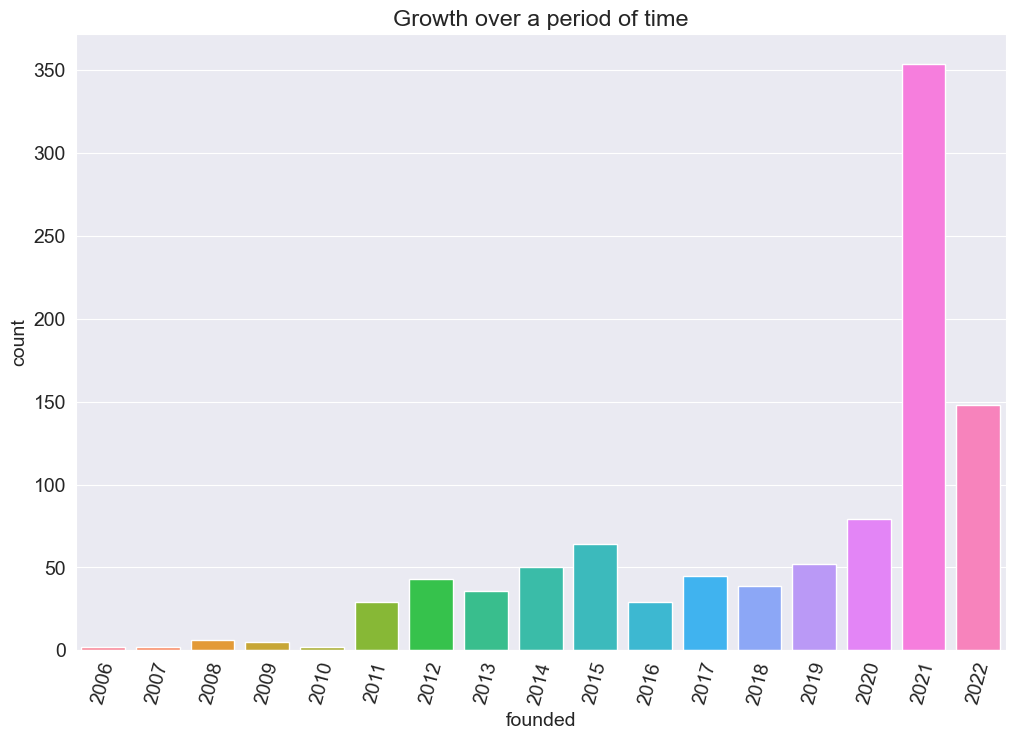

In [42]:
plt.figure(figsize=(12,8))
plt.xticks(rotation =75)
plt.title("Growth over a period of time") 
sns.countplot(x='founded', data=us_startups_df,saturation=1)

##### INSIGHTS
- Startups were very less before 2010 and it started to increase after 2011
- Even pandemic couldn't stop the growth of startups
- Growth of startups were more during pandemic
- Number of startups were highest in 2021

### Location

The distribution of startup companies location in US is also a factor to look at

In [43]:
startups_us_df=us_startups_df[us_startups_df['country']=='USA'];
#startups_us_df
startups_us=startups_us_df.location.value_counts().head(20)

<AxesSubplot: title={'center': 'Location'}, xlabel='States of US', ylabel='location'>

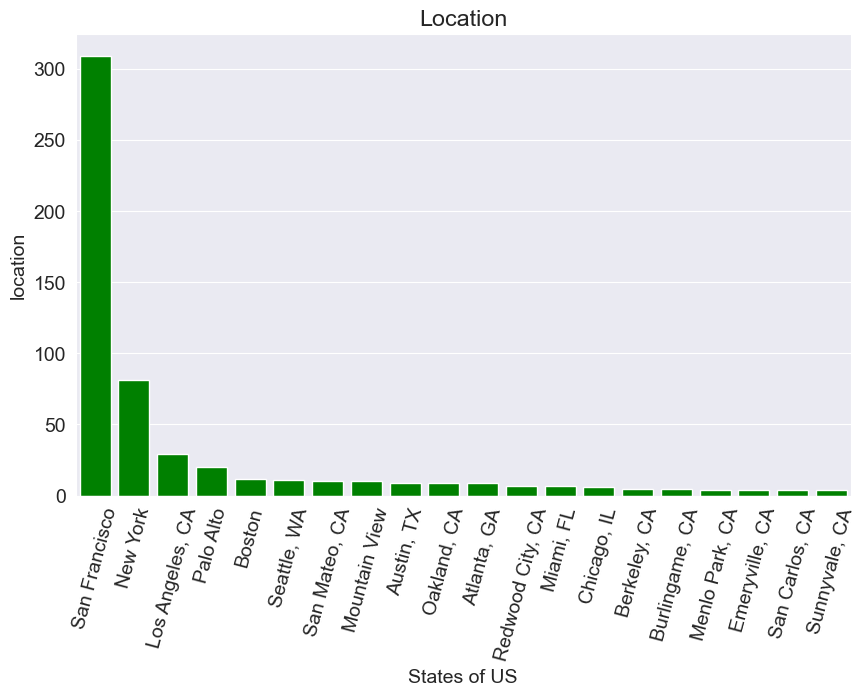

In [44]:
plt.figure(figsize=(10,6))
plt.xticks(rotation =75)
plt.title("Location") 
plt.xlabel("States of US") 
plt.ylabel("Count")
sns.barplot(x=startups_us.index, y=startups_us,saturation=5,color='green')

##### INSIGHTS
- Maximum startups companies prefered San Francisco as a perfect location for their growth and income US.
- New York is the second prefered by startups companies in US.

### Team Size

Let's look at the team size of the startups

In [45]:
us_startups_df.sort_values('team_size', ascending=False).head(5)

,id,company_name,short_description,founded,team_size,location,country,no_founders,no_company_socials,no_tags
0,1,Airbnb,Book accommodations around the world.,2008,5000,San Francisco,USA,3,4,4
4,5,Dropbox,Backup and share files in the cloud.,2008,4000,San Francisco,USA,2,4,2
25,26,Flexport,Platform for global logistics.,2013,2800,San Francisco,USA,1,3,5
15,16,Stripe,Payments infrastructure for the internet.,2021,2600,San Francisco,USA,2,2,5
252,253,Redcliffe Lifetech,Redcliffe Labs is India's Largest Omni-channel...,2018,2500,"Gurugram, India",India,3,3,7


##### INSIGHTS
- Airbnb is the big company in US with team size 5000

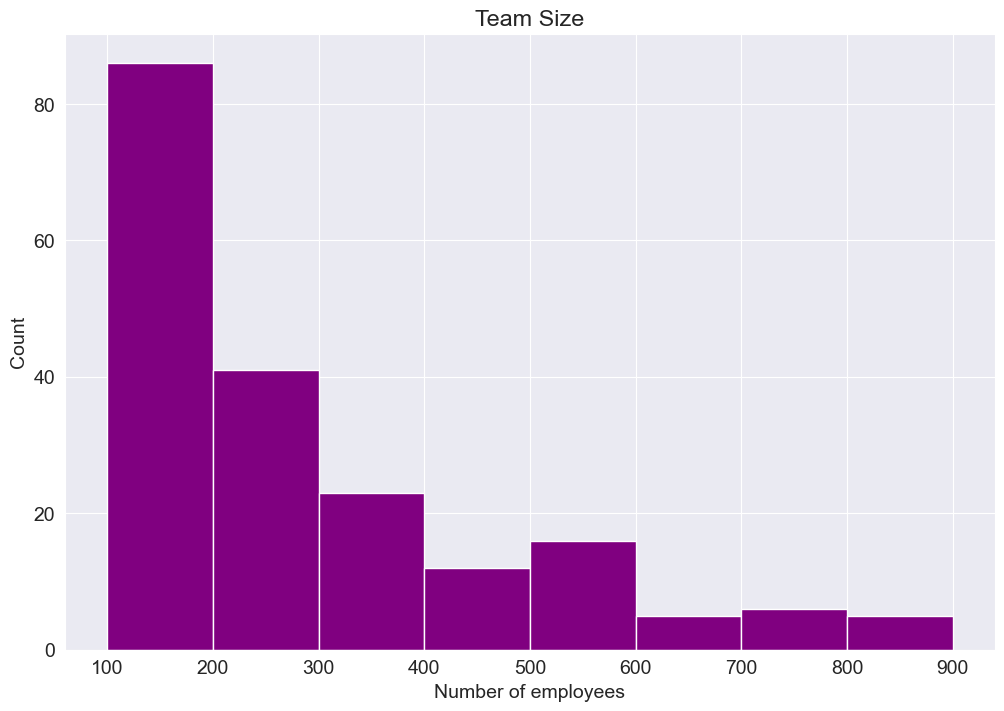

In [46]:
plt.figure(figsize=(12,8))
plt.title("Team Size")
plt.xlabel("Number of employees") 
plt.ylabel("Count")
plt.hist(us_startups_df.team_size, bins=np.arange(100,1000,100), color='purple');

##### INSIGHTS
- It appears that a most of the companies have around 100 to 400 employees in their teams

### Company tag

Let's understand which startups are working on which area of technology

In [47]:
# let's read another file-company tagged
company_df1=pd.read_csv(r"C:\Users\dimpl\Downloads\company_to_tag.csv",encoding="utf-8");
company_df1

,id,company_id,tag_id
0,1,1,136
1,2,1,51
2,3,1,117
3,4,1,8
4,5,2,47
...,...,...,...
4180,4181,1000,4
4181,4182,1000,1
4182,4183,1000,6
4183,4184,1000,32


In [48]:
company_df2=pd.read_csv(r"C:\Users\dimpl\Downloads\tags.csv")
company_df2

,id,tag
0,1,Active
1,2,SaaS
2,3,S22
3,4,W22
4,5,B2B
...,...,...
197,198,Cryogenics
198,199,Civic Tech
199,200,Drones
200,201,Fusion Energy


In [49]:
merged_comp_tag=company_df1.merge(company_df2, left_on='tag_id', right_on='id')
merged_comp_tag

,id_x,company_id,tag_id,id_y,tag
0,1,1,136,136,W09
1,2374,641,136,136,W09
2,2644,690,136,136,W09
3,2,1,51,51,Public
4,6,2,51,51,Public
...,...,...,...,...,...
4180,3276,810,160,160,Hydrogen Energy
4181,3313,816,175,175,Cultured Meat
4182,3314,816,174,174,Clean Meat
4183,3499,854,173,173,COVID-19


In [50]:
merged_comp_tag.drop(columns=['id_x','id_y'],inplace=True);

In [51]:
merged_comp_tag.head(10)

,company_id,tag_id,tag
0,1,136,W09
1,641,136,W09
2,690,136,W09
3,1,51,Public
4,2,51,Public
5,3,51,Public
6,4,51,Public
7,5,51,Public
8,6,51,Public
9,7,51,Public


In [52]:
top_company_tagged=merged_comp_tag.tag.value_counts().head(20)
top_company_tagged

Active                    956
SaaS                      243
S22                       224
W22                       218
B2B                       203
Fintech                   193
Developer Tools            86
Marketplace                75
W15                        60
Artifical Intelligence     57
Crypto / Web3              57
S15                        57
Consumer                   55
Machine Learning           47
E-commerce                 44
W16                        42
Climate                    41
W14                        41
Healthcare                 38
S14                        35
Name: tag, dtype: int64

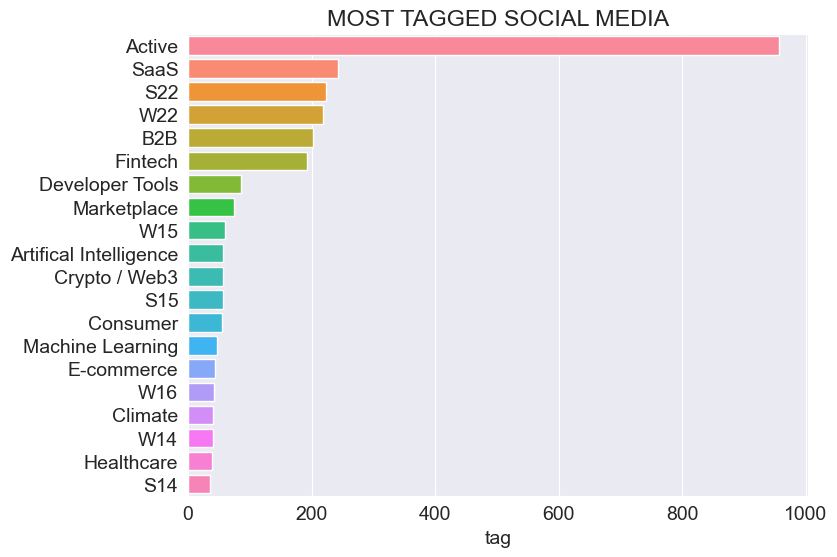

In [53]:
plt.figure(figsize=(8,6))
sns.barplot(y=top_company_tagged.index,x=top_company_tagged,saturation=1)
plt.title("MOST TAGGED SOCIAL MEDIA");

##### INSIGHTS
- Looks like SAAS,Fintech and others are the areas of technology which startups prefer.

### Social Media

#### Let's look at the social media accounts associated with startups in the US

In [54]:
# let's read another file-Social media
social_df1=pd.read_csv(r"C:\Users\dimpl\Downloads\company_social_to_social.csv",encoding="utf-8");
social_df1

,id,social_media_id,company_id
0,1,1,1
1,2,2,1
2,3,4,1
3,4,3,1
4,5,3,2
...,...,...,...
2396,2397,4,999
2397,2398,1,1000
2398,2399,2,1000
2399,2400,4,1000


In [55]:
social_df2=pd.read_csv(r"C:\Users\dimpl\Downloads\socials.csv")
social_df2

,id,social
0,1,linkedin
1,2,twitter
2,3,crunchbase
3,4,facebook
4,5,mobile
5,6,instagram
6,7,youtube
7,8,github


In [56]:
merged_social=social_df1.merge(social_df2, left_on='social_media_id', right_on='id')
merged_social

,id_x,social_media_id,company_id,id_y,social
0,1,1,1,1,linkedin
1,6,1,3,1,linkedin
2,13,1,5,1,linkedin
3,17,1,6,1,linkedin
4,19,1,7,1,linkedin
...,...,...,...,...,...
2396,1808,5,723,5,mobile
2397,1718,6,677,6,instagram
2398,1728,6,682,6,instagram
2399,2115,6,874,6,instagram


In [57]:
merged_social.drop(columns=['id_x','id_y'],inplace=True);

In [58]:
merged_social

,social_media_id,company_id,social
0,1,1,linkedin
1,1,3,linkedin
2,1,5,linkedin
3,1,6,linkedin
4,1,7,linkedin
...,...,...,...
2396,5,723,mobile
2397,6,677,instagram
2398,6,682,instagram
2399,6,874,instagram


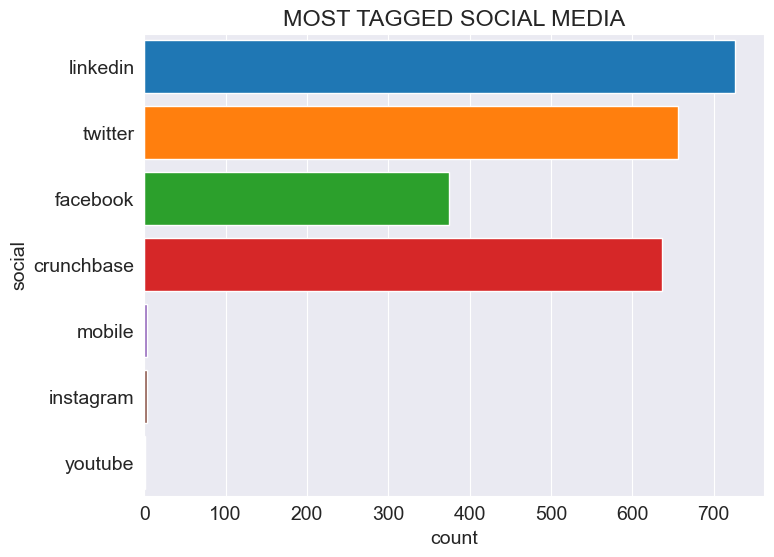

In [59]:
plt.figure(figsize=(8,6))
sns.countplot(y=merged_social.social,saturation=1)
plt.title("MOST TAGGED SOCIAL MEDIA");

##### INSIGHTS
- Linkedin has been US startup companies most-loved  social media followed by twitter and crunchbase.